In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Removing outlier values from the dataset

The `plot_hr_data` function reads heart rate (HR) data from CSV files for a specified video, normalizes the data, and stores it in a dictionary. It then concatenates the HR data into a single DataFrame, plots the HR data for each participant, and calculates the average HR and standard deviation over time. The function creates additional plots to visualize the average HR with a shaded area representing one standard deviation. Finally, it returns the DataFrame containing the HR data, average HR, and standard deviation.

In [2]:
def plot_hr_data(video):
    path = f'./data/Video_Data/Video_{video}'
    files = glob.glob(os.path.join(path, '*.csv'))

    video_participant_data = {}

    for file in files:
        if "_data" in file:
            participant = file.split('\\')[-1].split('.')[0]
            data = pd.read_csv(file)
            # z normalise the HR data
            video_participant_data[participant] = data

    video_hr_data = pd.concat([video_participant_data[participant]['HR'] for participant in video_participant_data.keys()], axis=1)
    video_hr_data.columns = video_participant_data.keys()

    plt.figure(figsize=(20, 5))
    plt.plot(video_hr_data)
    plt.xlabel('Time (s)')
    plt.ylabel('HR (bpm)')
    plt.title(f'HR Data for Video {video}')
    plt.legend(video_hr_data.columns)
    plt.show()

    video_hr_data['Average'] = video_hr_data.mean(axis=1)
    video_hr_data['Standard Deviation'] = video_hr_data.std(axis=1)

    plt.figure(figsize=(20, 5))
    plt.plot(video_hr_data['Average'], label='Average')
    plt.fill_between(video_hr_data.index, video_hr_data['Average'] - video_hr_data['Standard Deviation'], video_hr_data['Average'] + video_hr_data['Standard Deviation'], alpha=0.3)
    plt.xlabel('Time (s)')
    plt.ylabel('HR (bpm)')
    plt.title(f'Average HR Data for Video {video}')
    plt.legend()
    plt.show()

    return  video_hr_data

The `remove_outliers` function iterates through the columns of the provided DataFrame data to identify participants with heart rate (HR) data less than or equal to 10. It skips the "Average" and "Standard Deviation" columns, prints a message for each participant with such data, and deletes the corresponding CSV file for that participant. Finally, it returns the modified DataFrame.

In [3]:
def remove_outliers(data, video):
    for participant in data.columns[(data <= 10).any()]:
        if participant == "Average" or participant == "Standard Deviation":
            continue

        print(f"Participant {participant} has HR data < 10 in Video {video}")
        os.remove(f"./data/Video_Data/Video_{video}/{participant}.csv")

    return data

---

Iterates over each video, performs data analysis and visualization tasks, and removes outliers from the heart rate data.

-----------------------------------------------------------------------------
Video 2
-----------------------------------------------------------------------------

Original Data


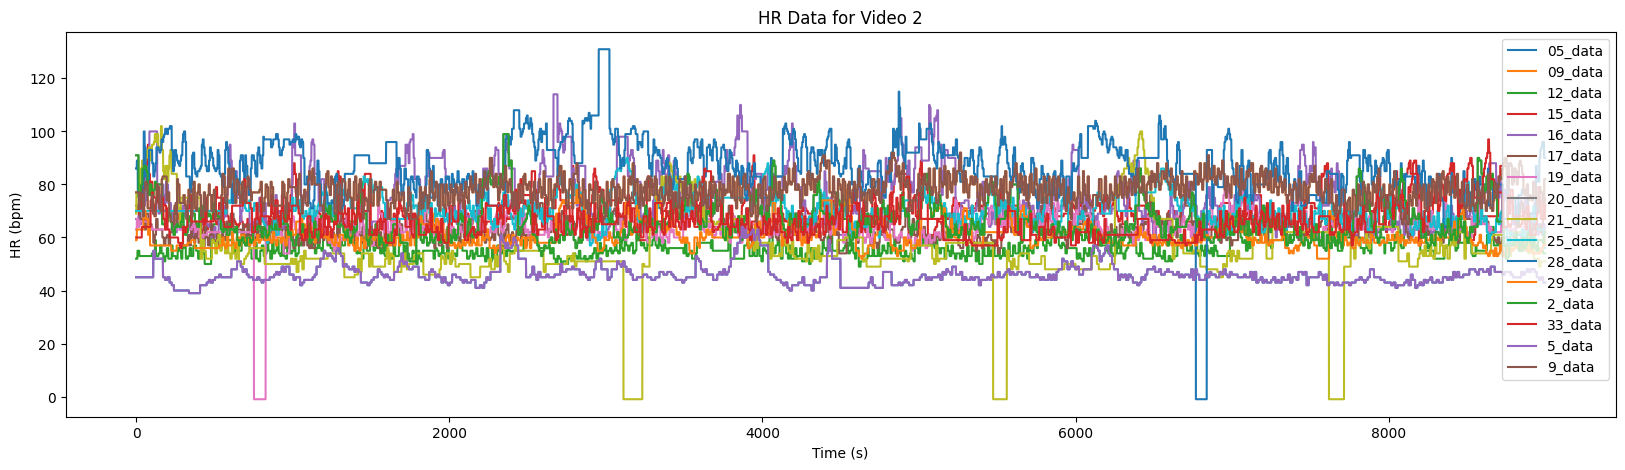

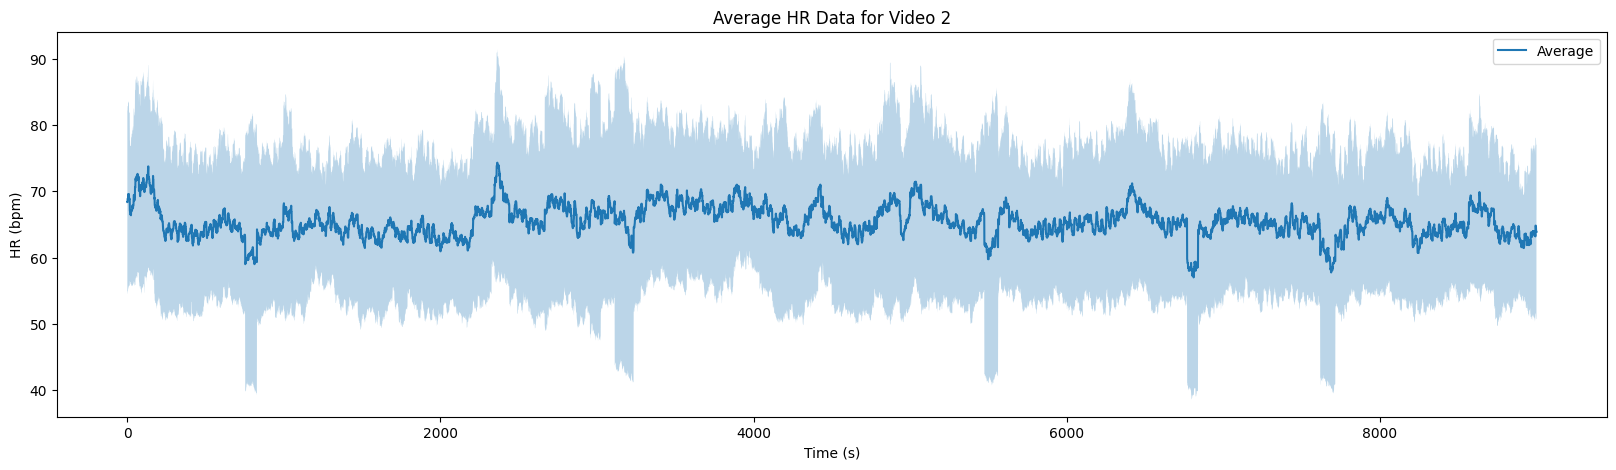


Removing Outliers
Participant 19_data has HR data < 10 in Video 2
Participant 21_data has HR data < 10 in Video 2
Participant 28_data has HR data < 10 in Video 2

Updated Data


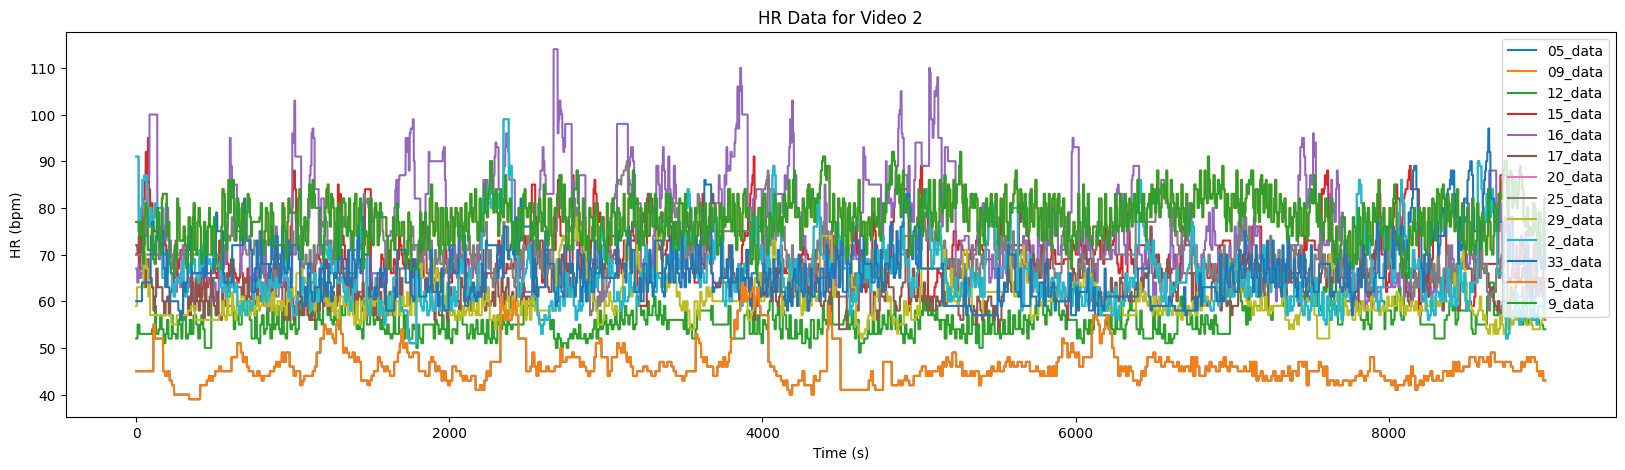

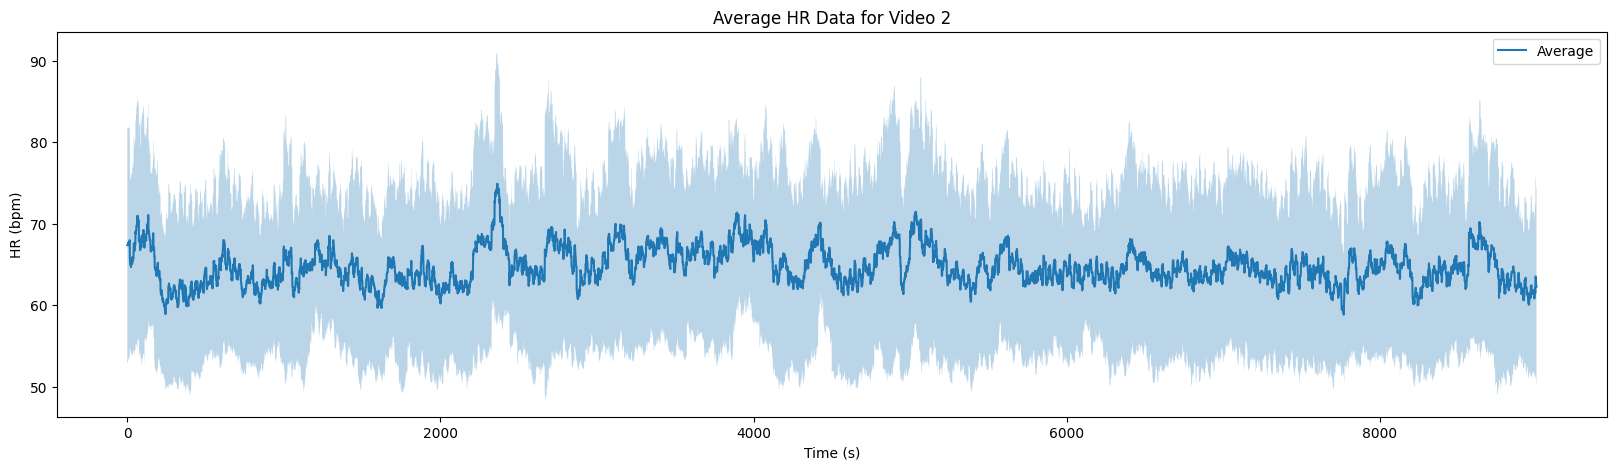

-----------------------------------------------------------------------------
Video 5
-----------------------------------------------------------------------------

Original Data


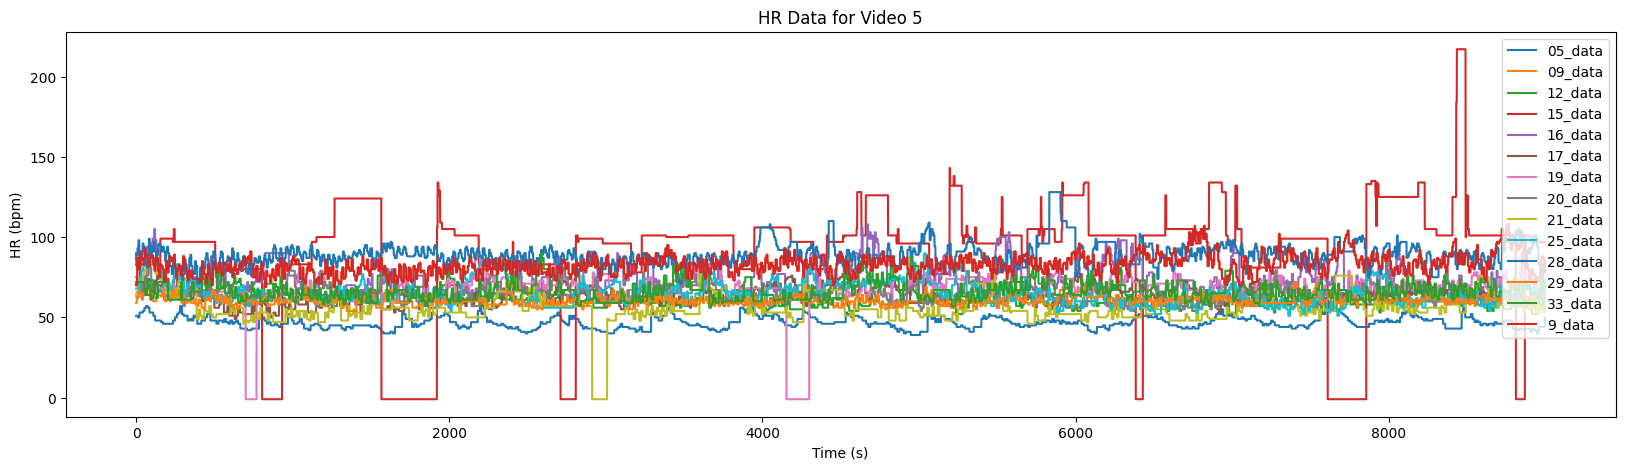

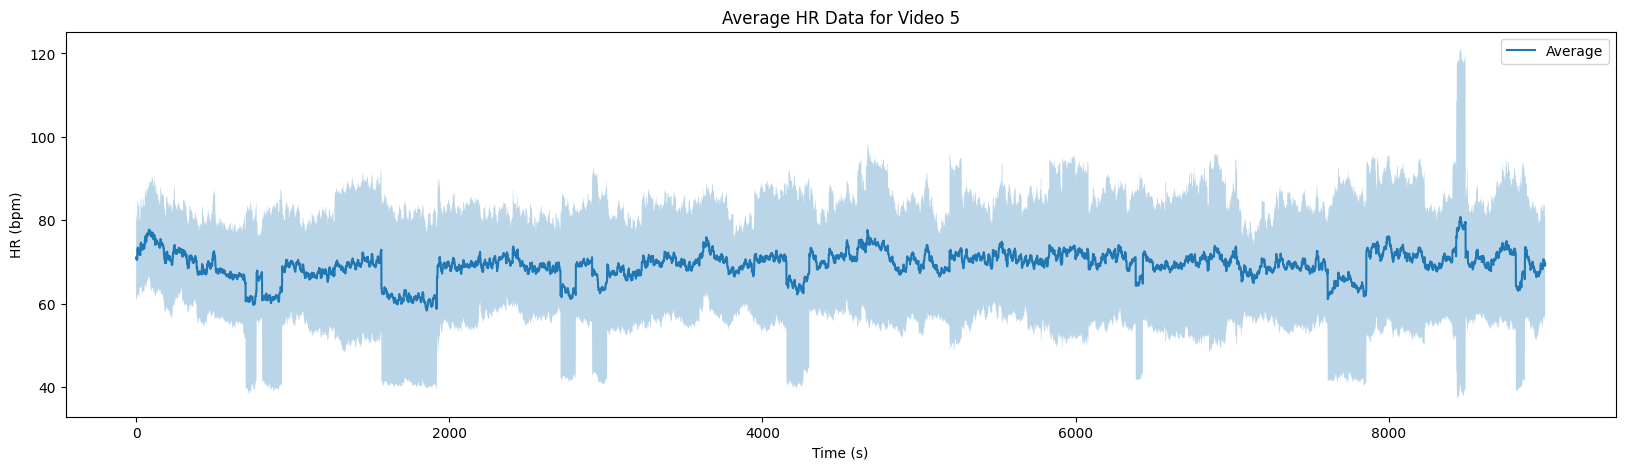


Removing Outliers
Participant 15_data has HR data < 10 in Video 5
Participant 19_data has HR data < 10 in Video 5
Participant 21_data has HR data < 10 in Video 5

Updated Data


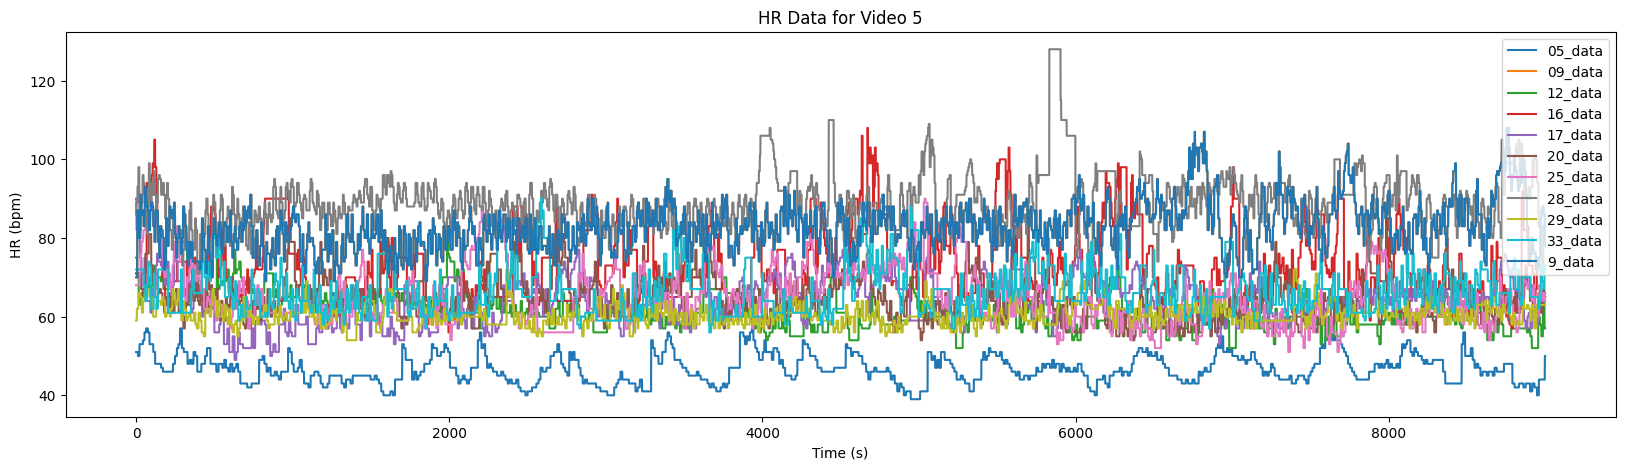

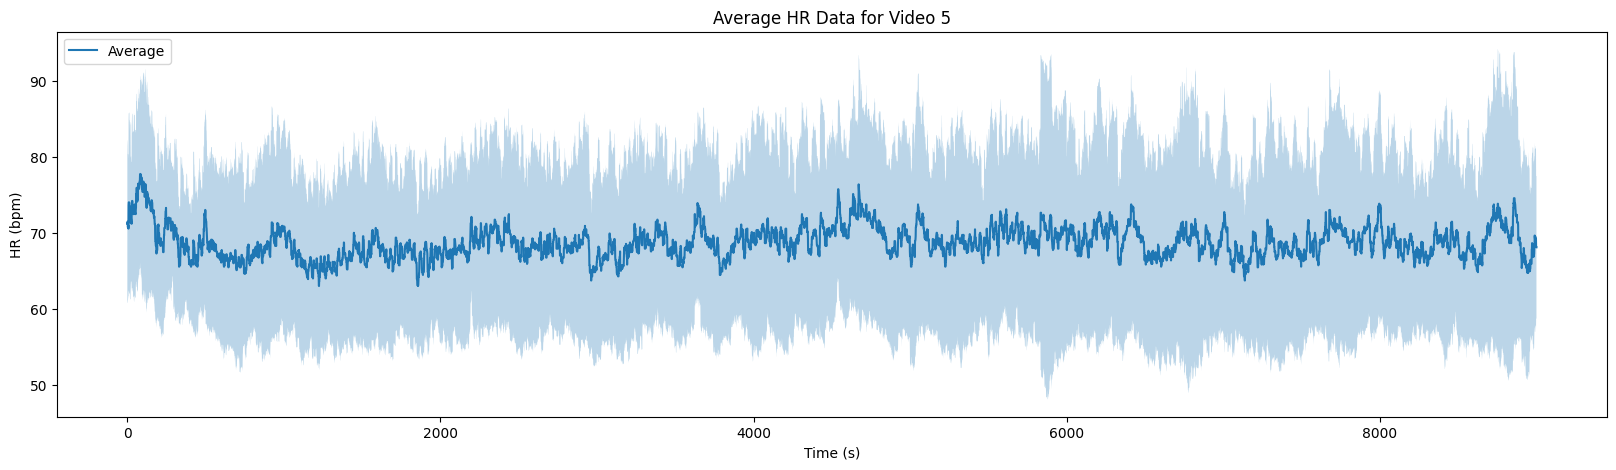

-----------------------------------------------------------------------------
Video 7
-----------------------------------------------------------------------------

Original Data


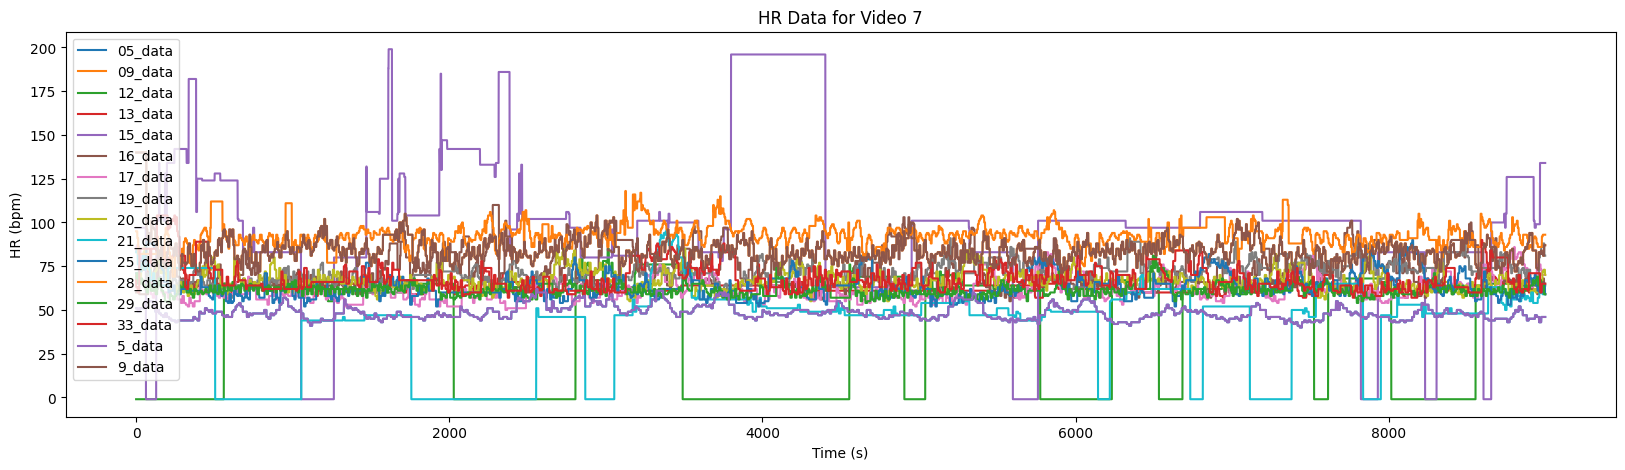

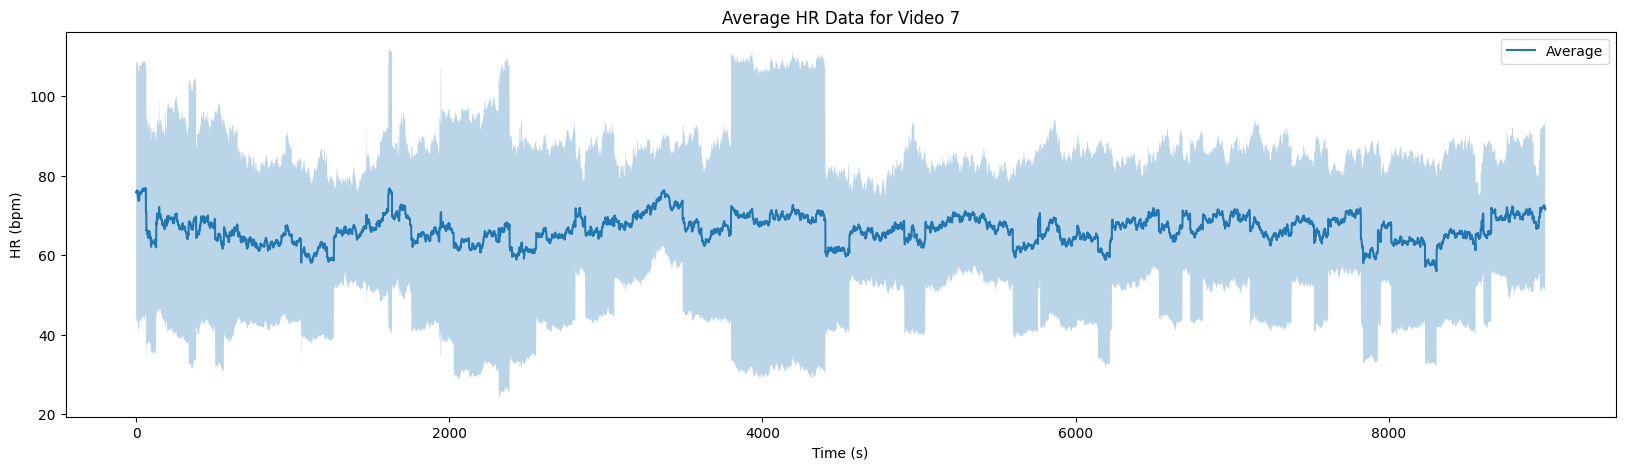


Removing Outliers
Participant 12_data has HR data < 10 in Video 7
Participant 15_data has HR data < 10 in Video 7
Participant 21_data has HR data < 10 in Video 7

Updated Data


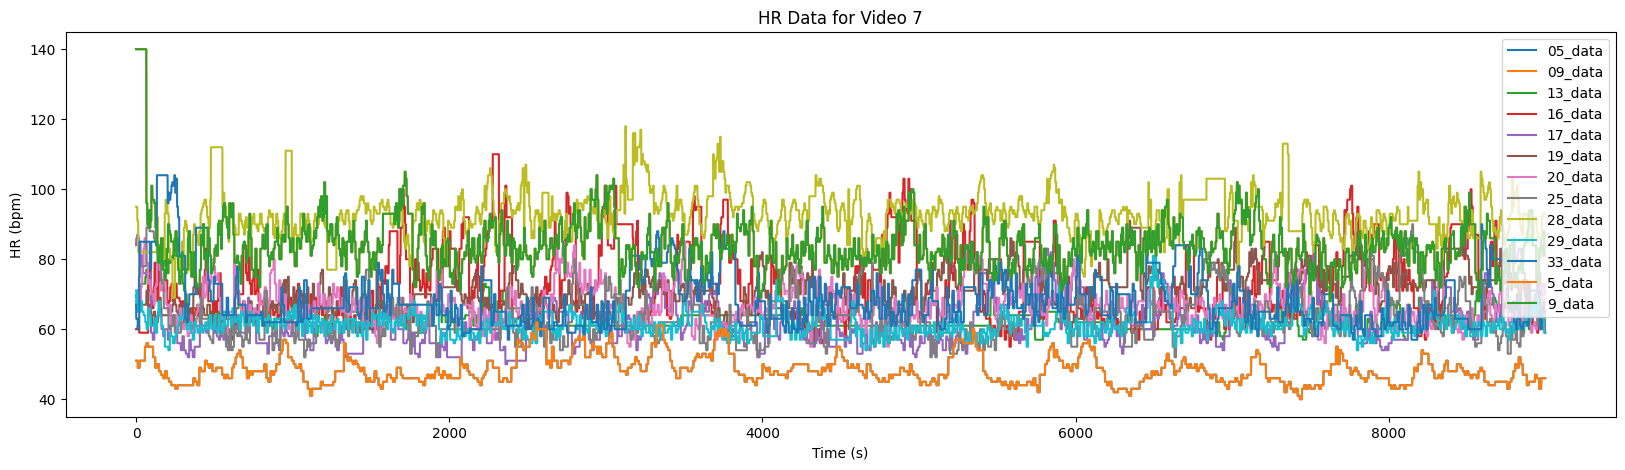

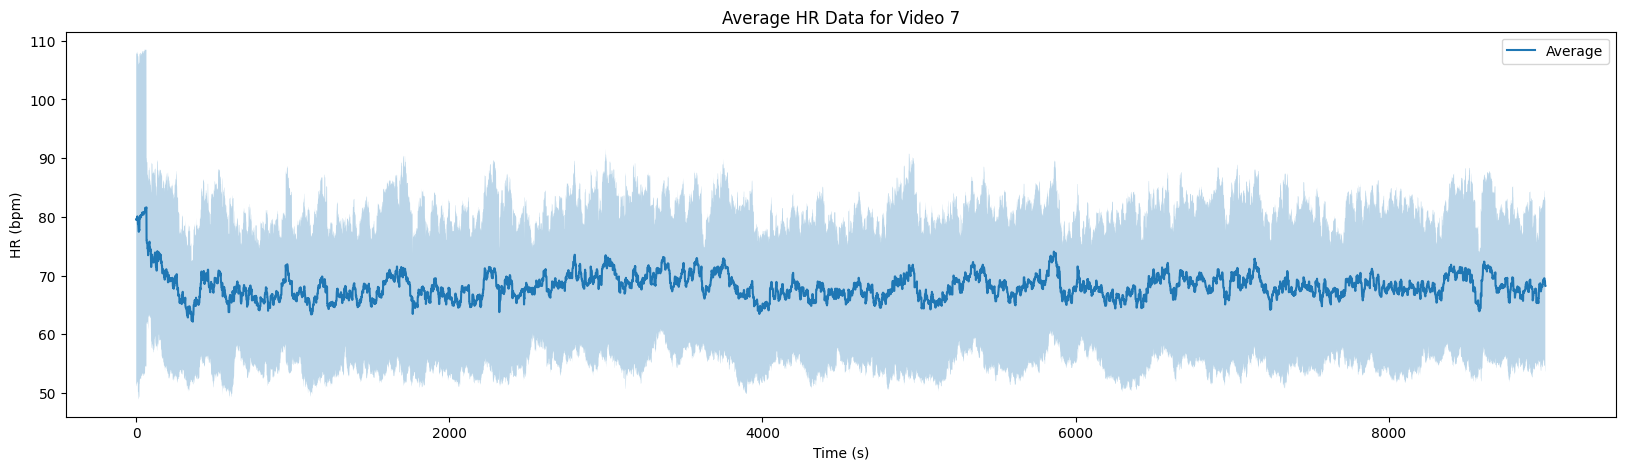

-----------------------------------------------------------------------------
Video 10
-----------------------------------------------------------------------------

Original Data


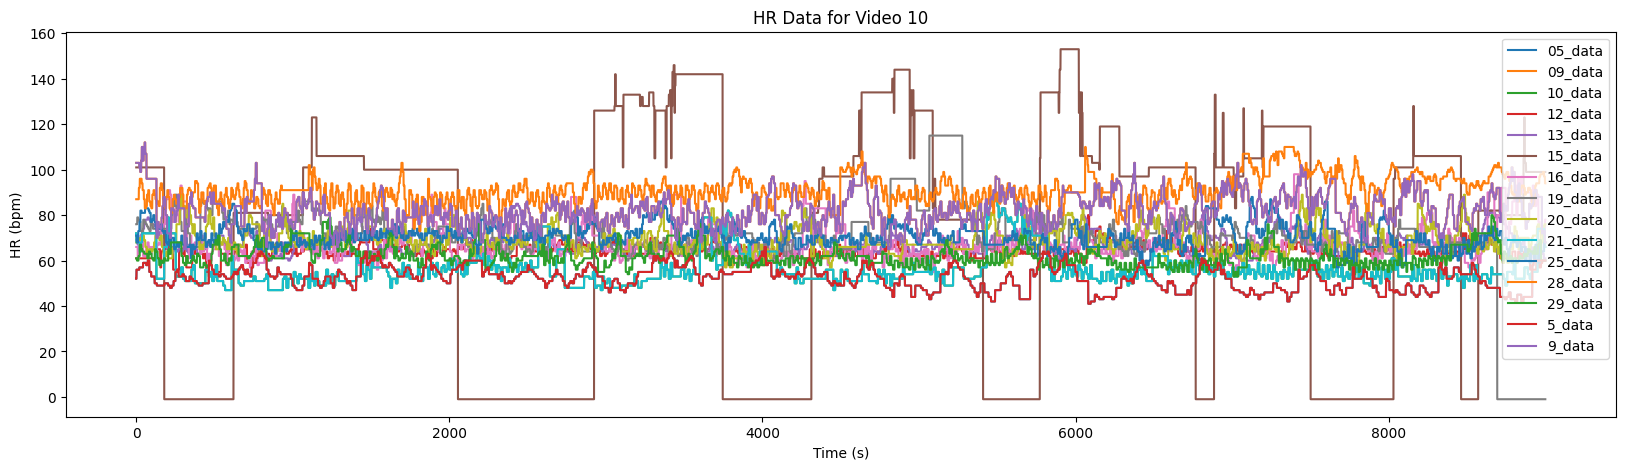

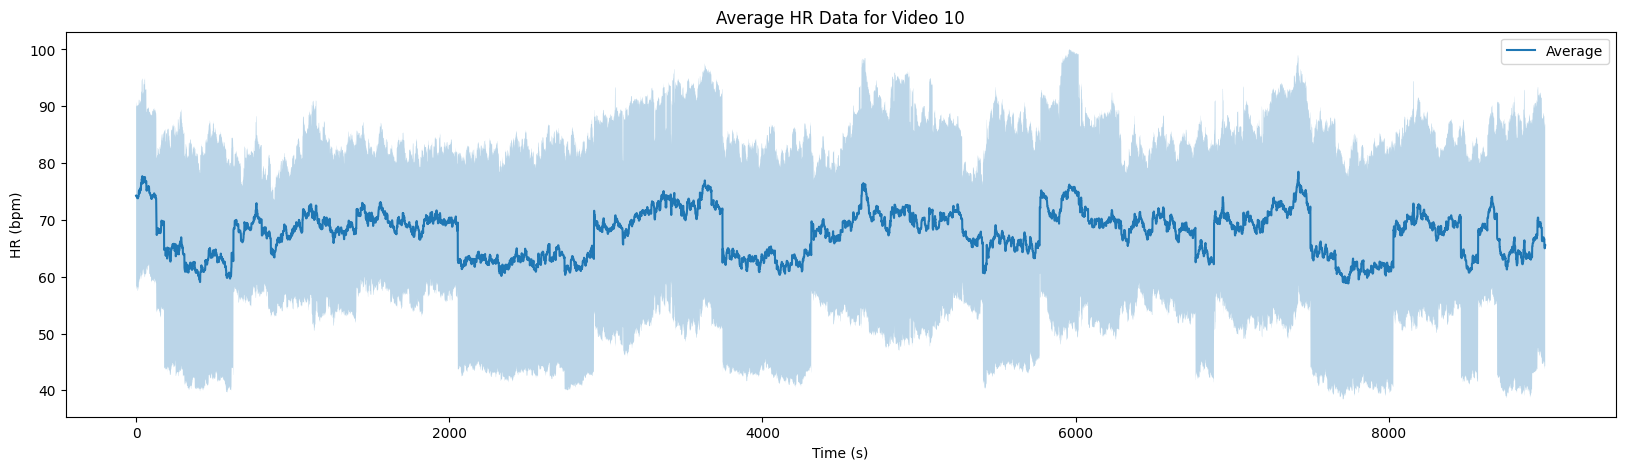


Removing Outliers
Participant 15_data has HR data < 10 in Video 10
Participant 19_data has HR data < 10 in Video 10

Updated Data


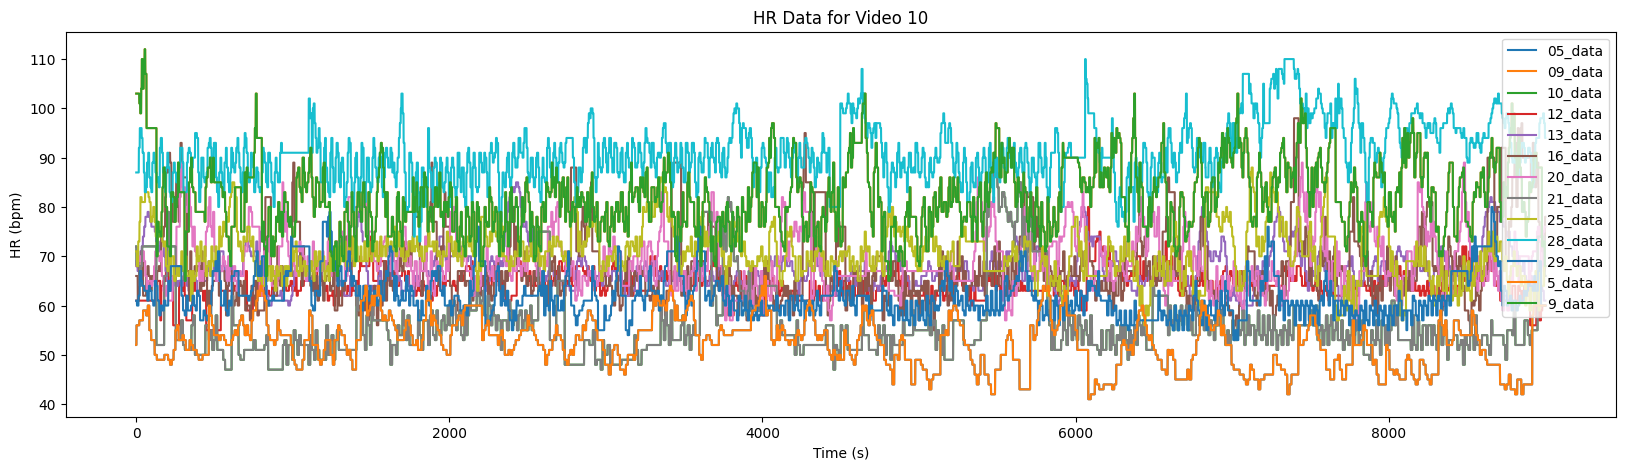

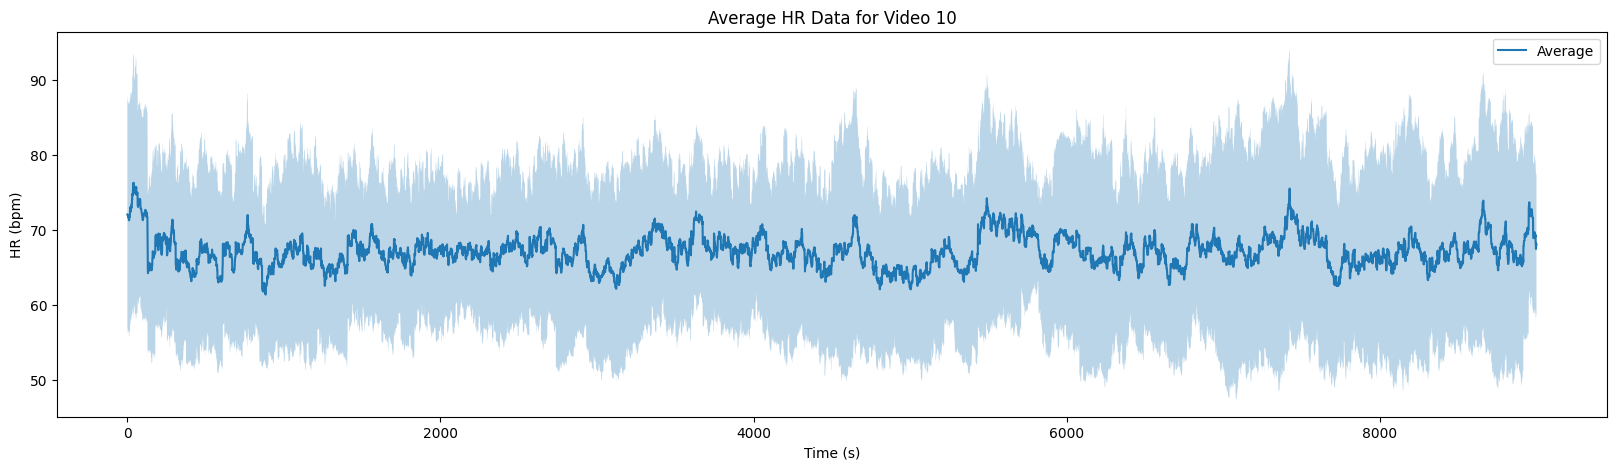

-----------------------------------------------------------------------------
Video 11
-----------------------------------------------------------------------------

Original Data


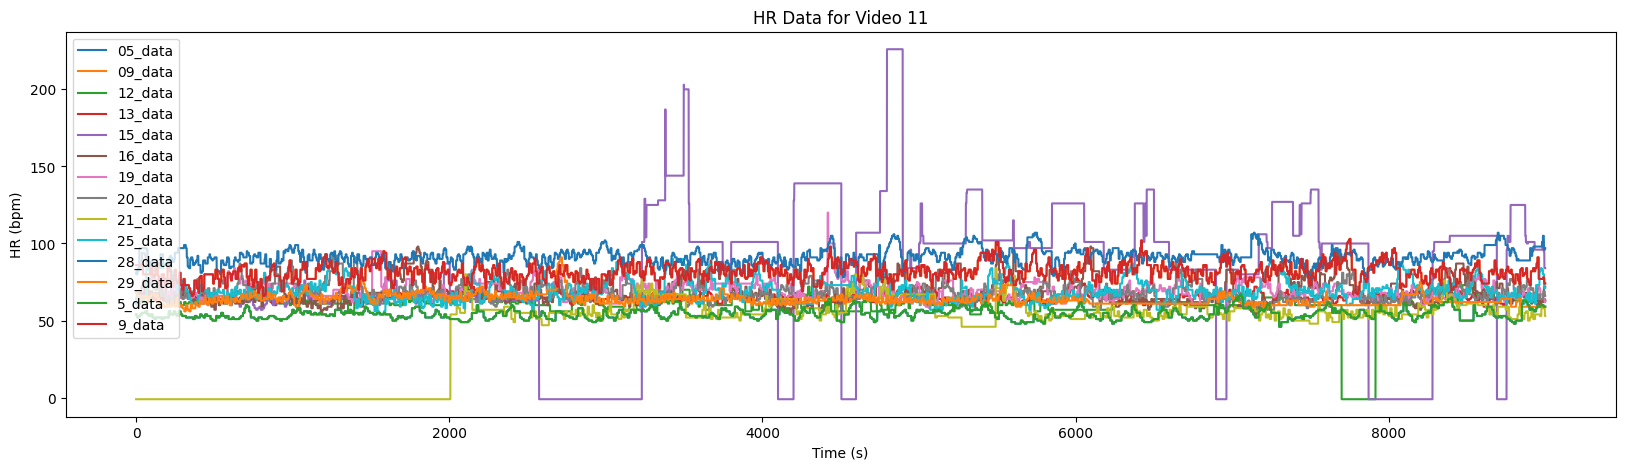

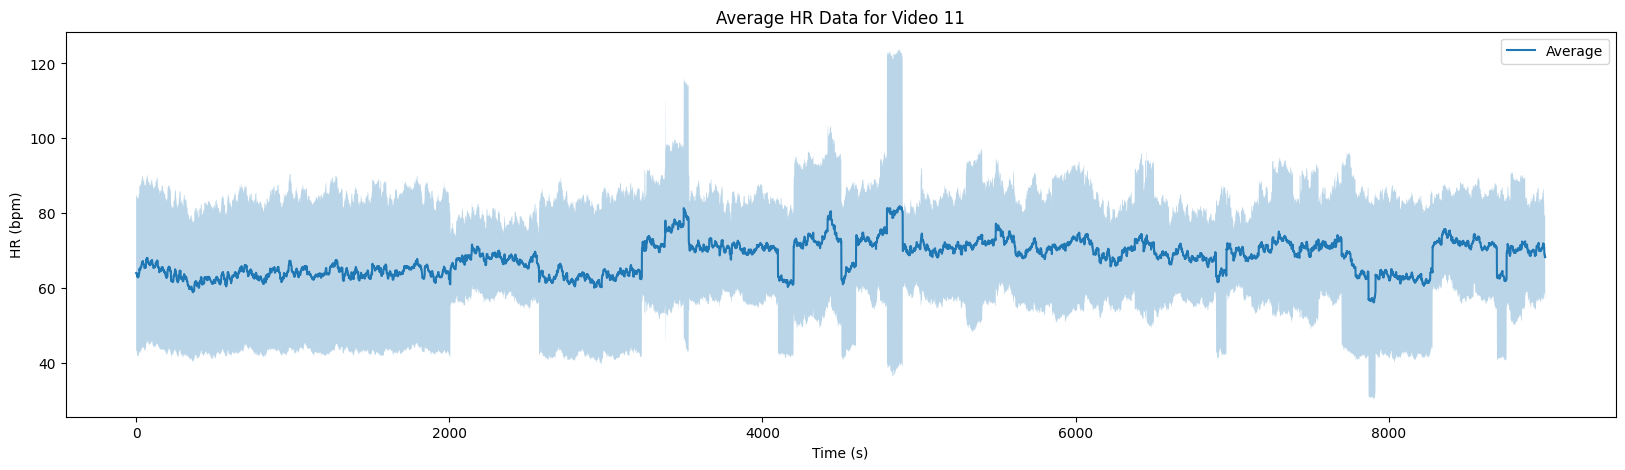


Removing Outliers
Participant 12_data has HR data < 10 in Video 11
Participant 15_data has HR data < 10 in Video 11
Participant 21_data has HR data < 10 in Video 11

Updated Data


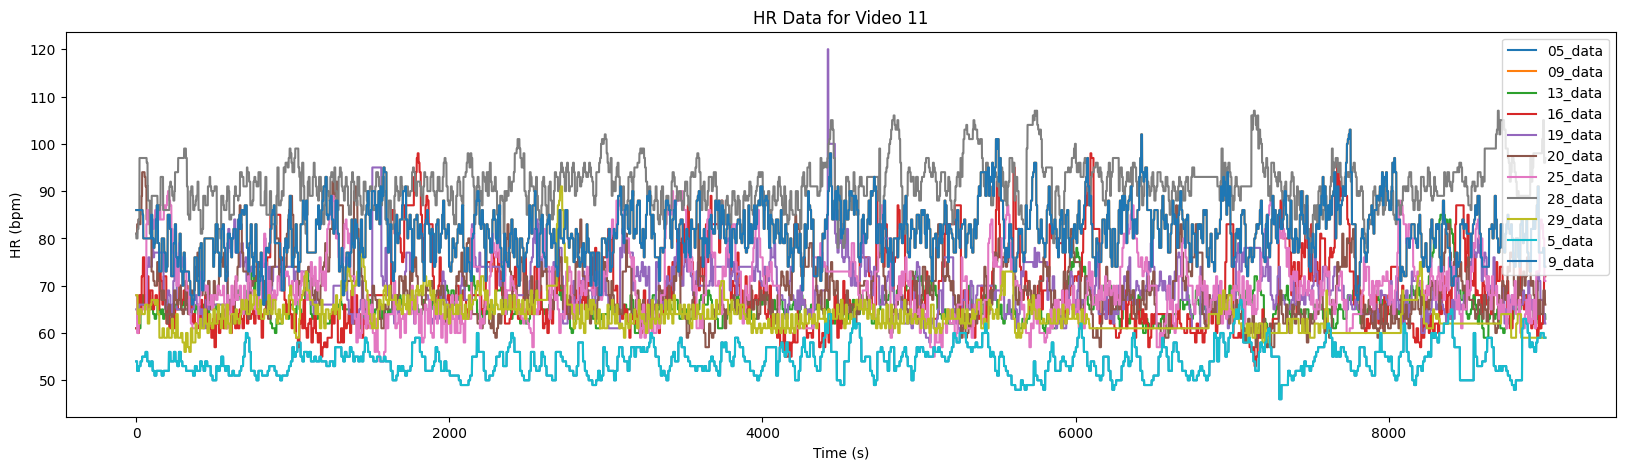

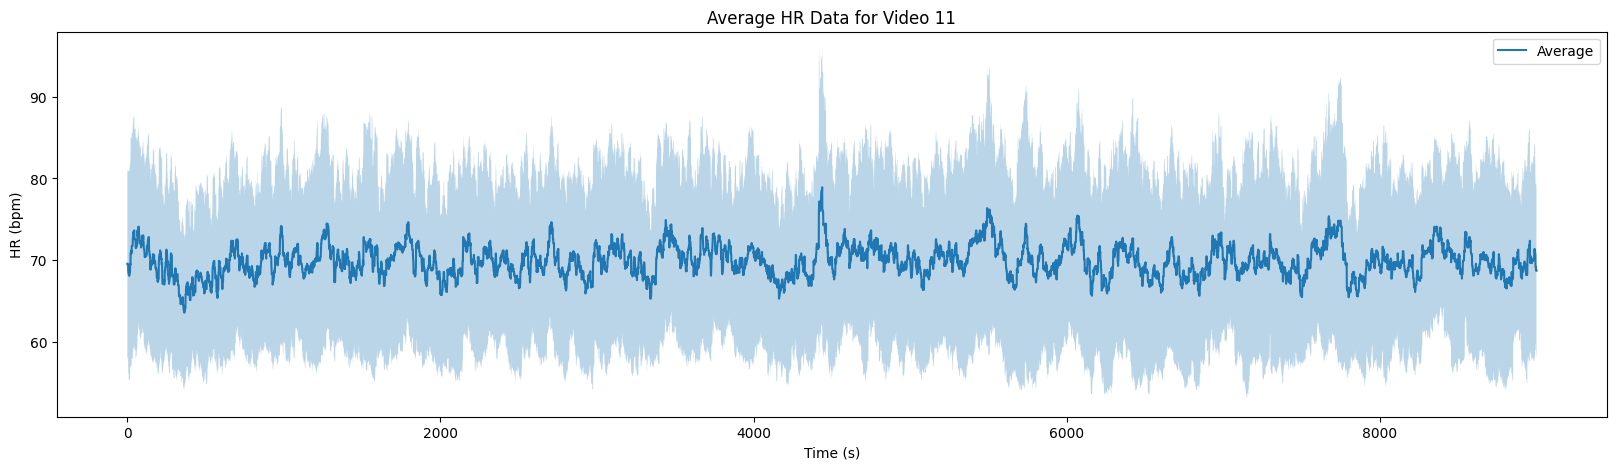

-----------------------------------------------------------------------------
Video 12
-----------------------------------------------------------------------------

Original Data


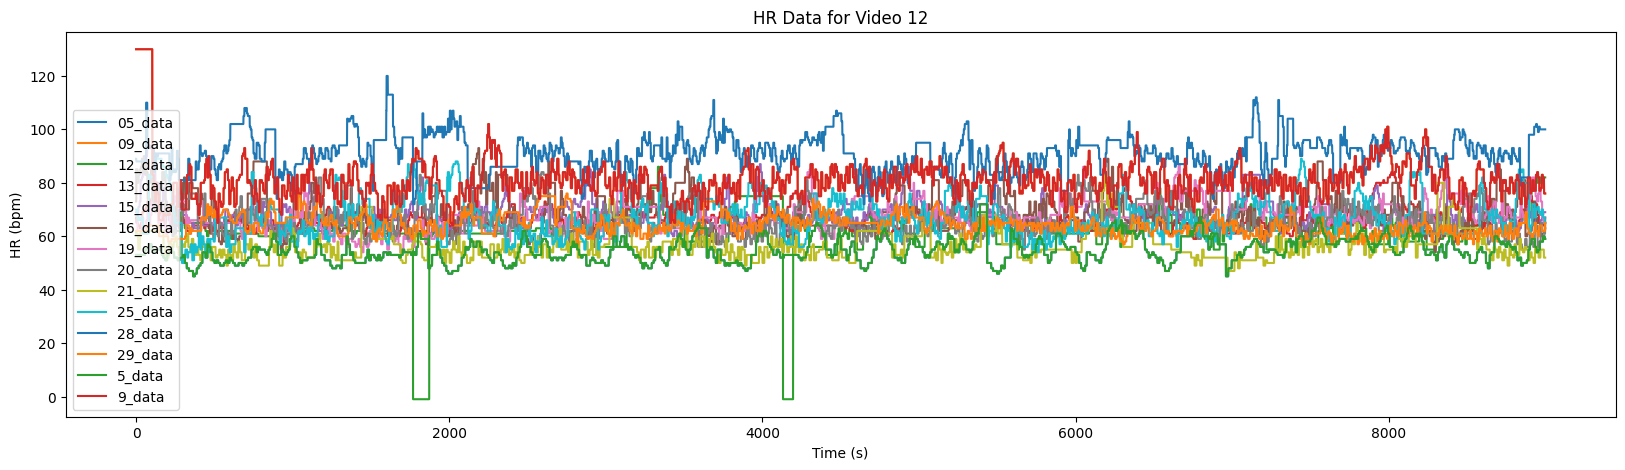

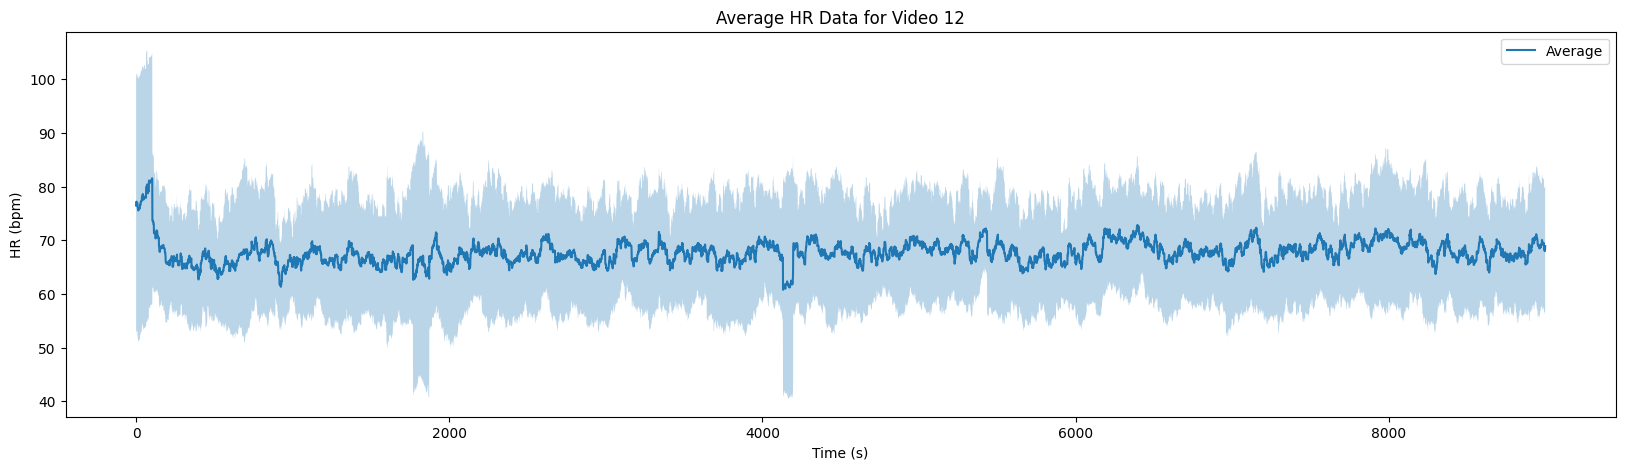


Removing Outliers
Participant 12_data has HR data < 10 in Video 12

Updated Data


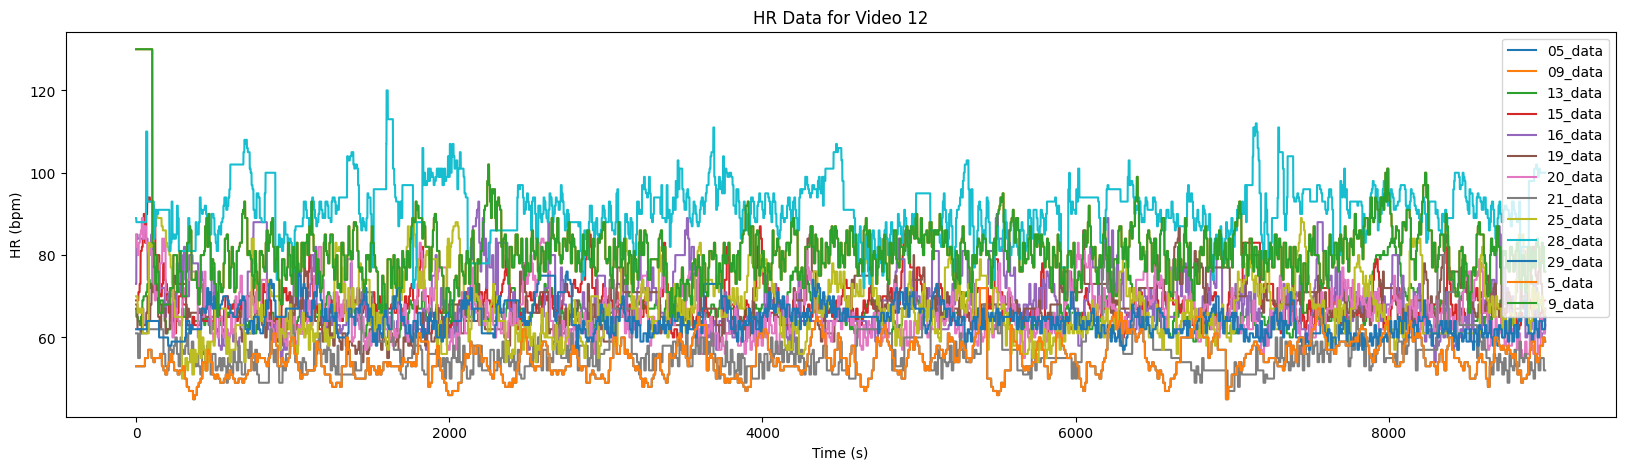

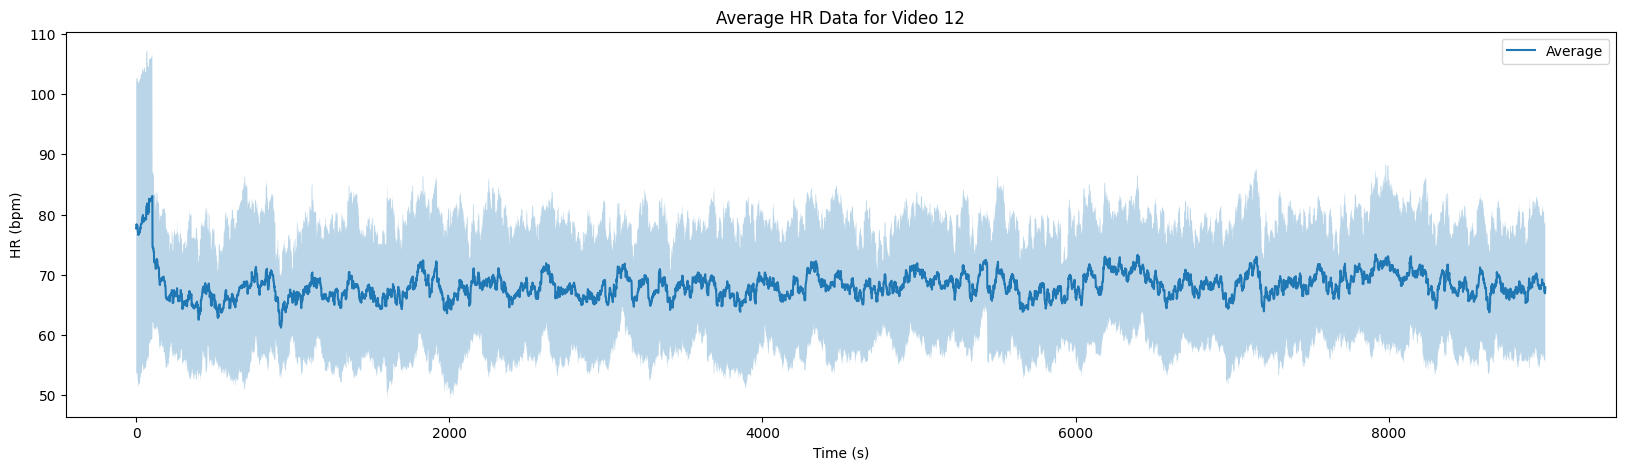

-----------------------------------------------------------------------------
Video 14
-----------------------------------------------------------------------------

Original Data


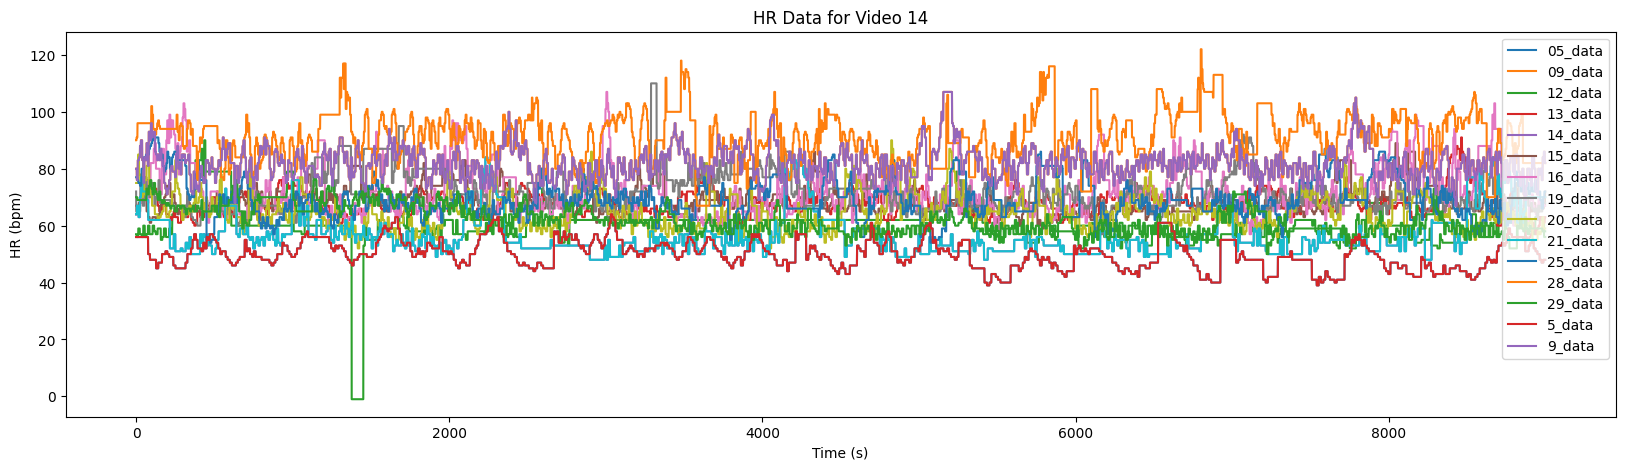

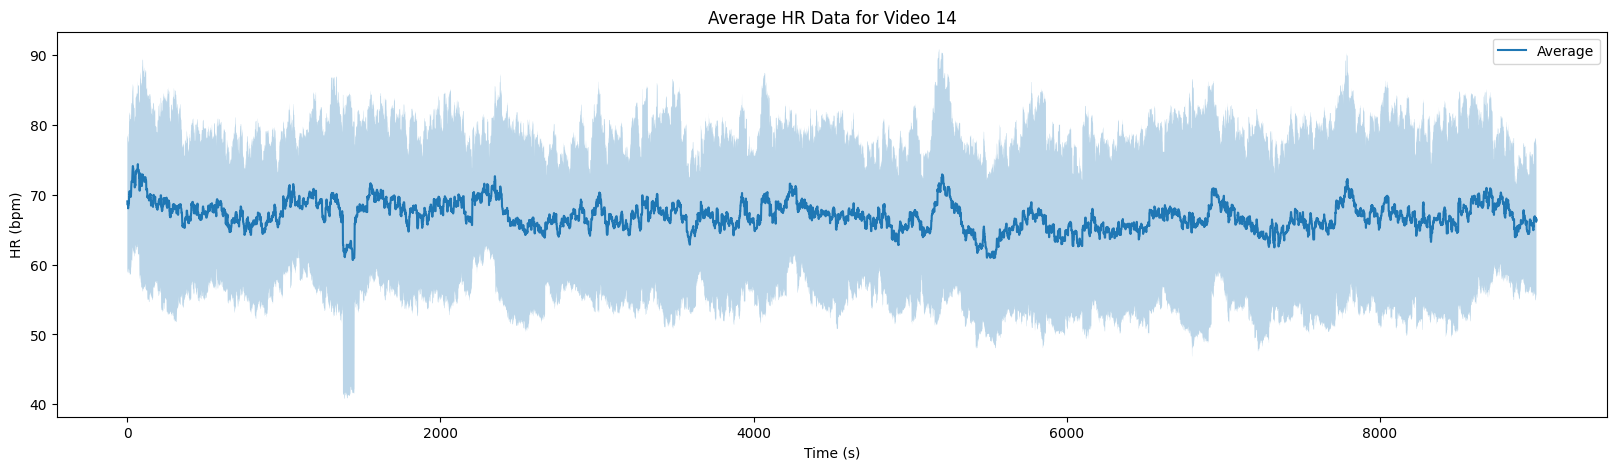


Removing Outliers
Participant 12_data has HR data < 10 in Video 14

Updated Data


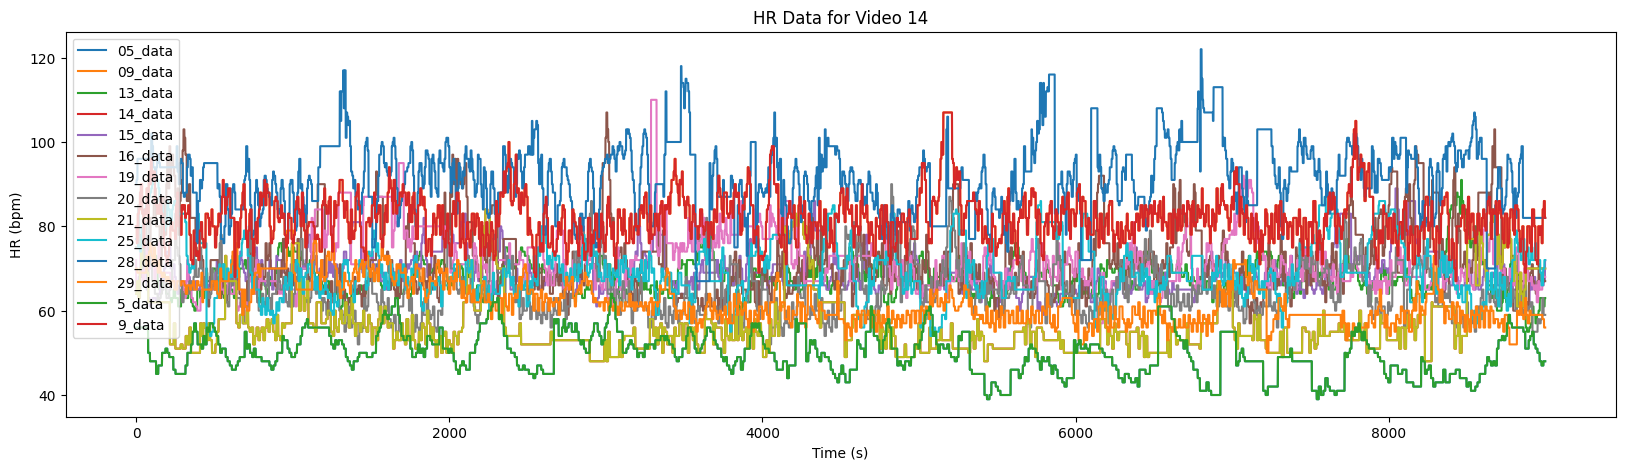

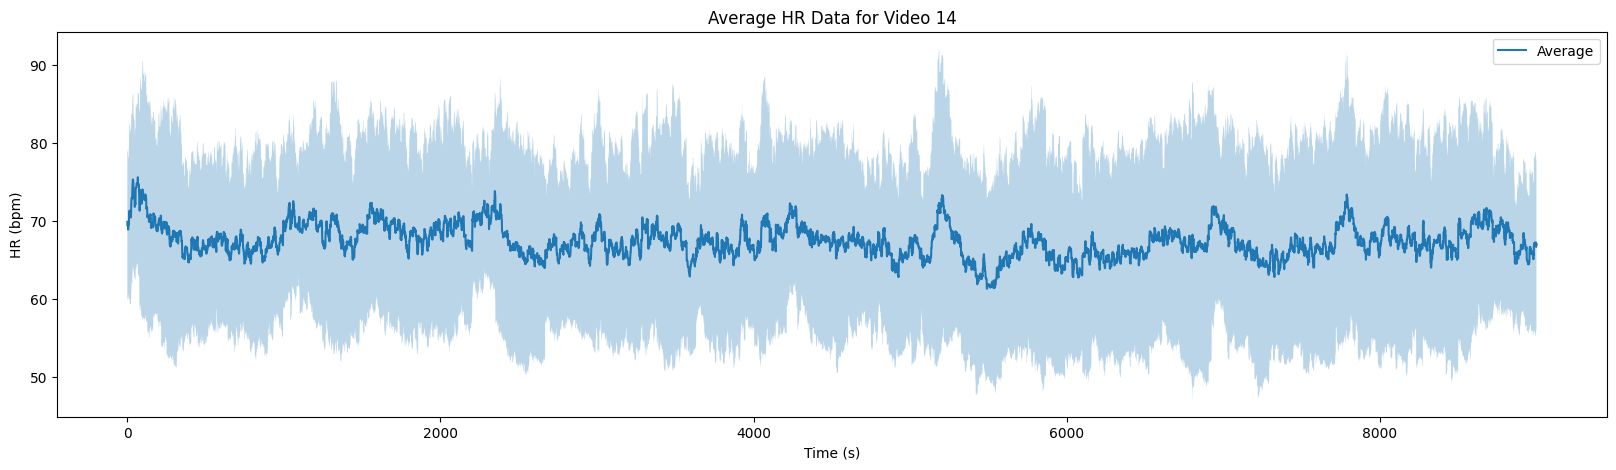

In [4]:
videos = [2, 5, 7, 10, 11, 12, 14]
for video in videos:
    print("-----------------------------------------------------------------------------")
    print(f"Video {video}")
    print("-----------------------------------------------------------------------------")

    print()
    print("Original Data")
    data = plot_hr_data(video)

    print()
    print("Removing Outliers")
    data = remove_outliers(data, video)

    print()
    print("Updated Data")
    plot_hr_data(video)